In [ ]:
!nvidia-smi

Tue Jul  1 16:35:47 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:

!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=yolo checks

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 42.1/112.6 GB disk)

OS                  Linux-6.1.123+-x86_64-with-glibc2.35
Environment         Colab
Python              3.11.13
Install             pip
Path                /usr/local/lib/python3.11/dist-packages/ultralytics
RAM                 12.67 GB
Disk                42.1/112.6 GB
CPU                 Intel Xeon 2.30GHz
CPU count           2
GPU                 Tesla T4, 15095MiB
GPU count           1
CUDA                12.4

numpy               ✅ 2.0.2>=1.23.0
matplotlib          ✅ 3.10.0>=3.3.0
opencv-python       ✅ 4.11.0.86>=4.6.0
pillow              ✅ 11.2.1>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.15.3>=1.4.1
torch               ✅ 2.6.0+cu124>=1.8.0
torch               ✅ 2.6.0+cu124!=2.4.0,>=1.8.0; sys_platform == "win32"
torchvision         ✅ 0.21.0+cu124>=0.9.0
tqdm                ✅ 4.67.

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Lc5Zsror7KEAPwVHhhr4")
project = rf.workspace("eureka-c2uug").project("makerspace")
version = project.version(8)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!yolo task=detect mode=train model=/content/yolo11n.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/MakerSpace-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.

In [ ]:
!ls /content/runs/detect/

train  train2


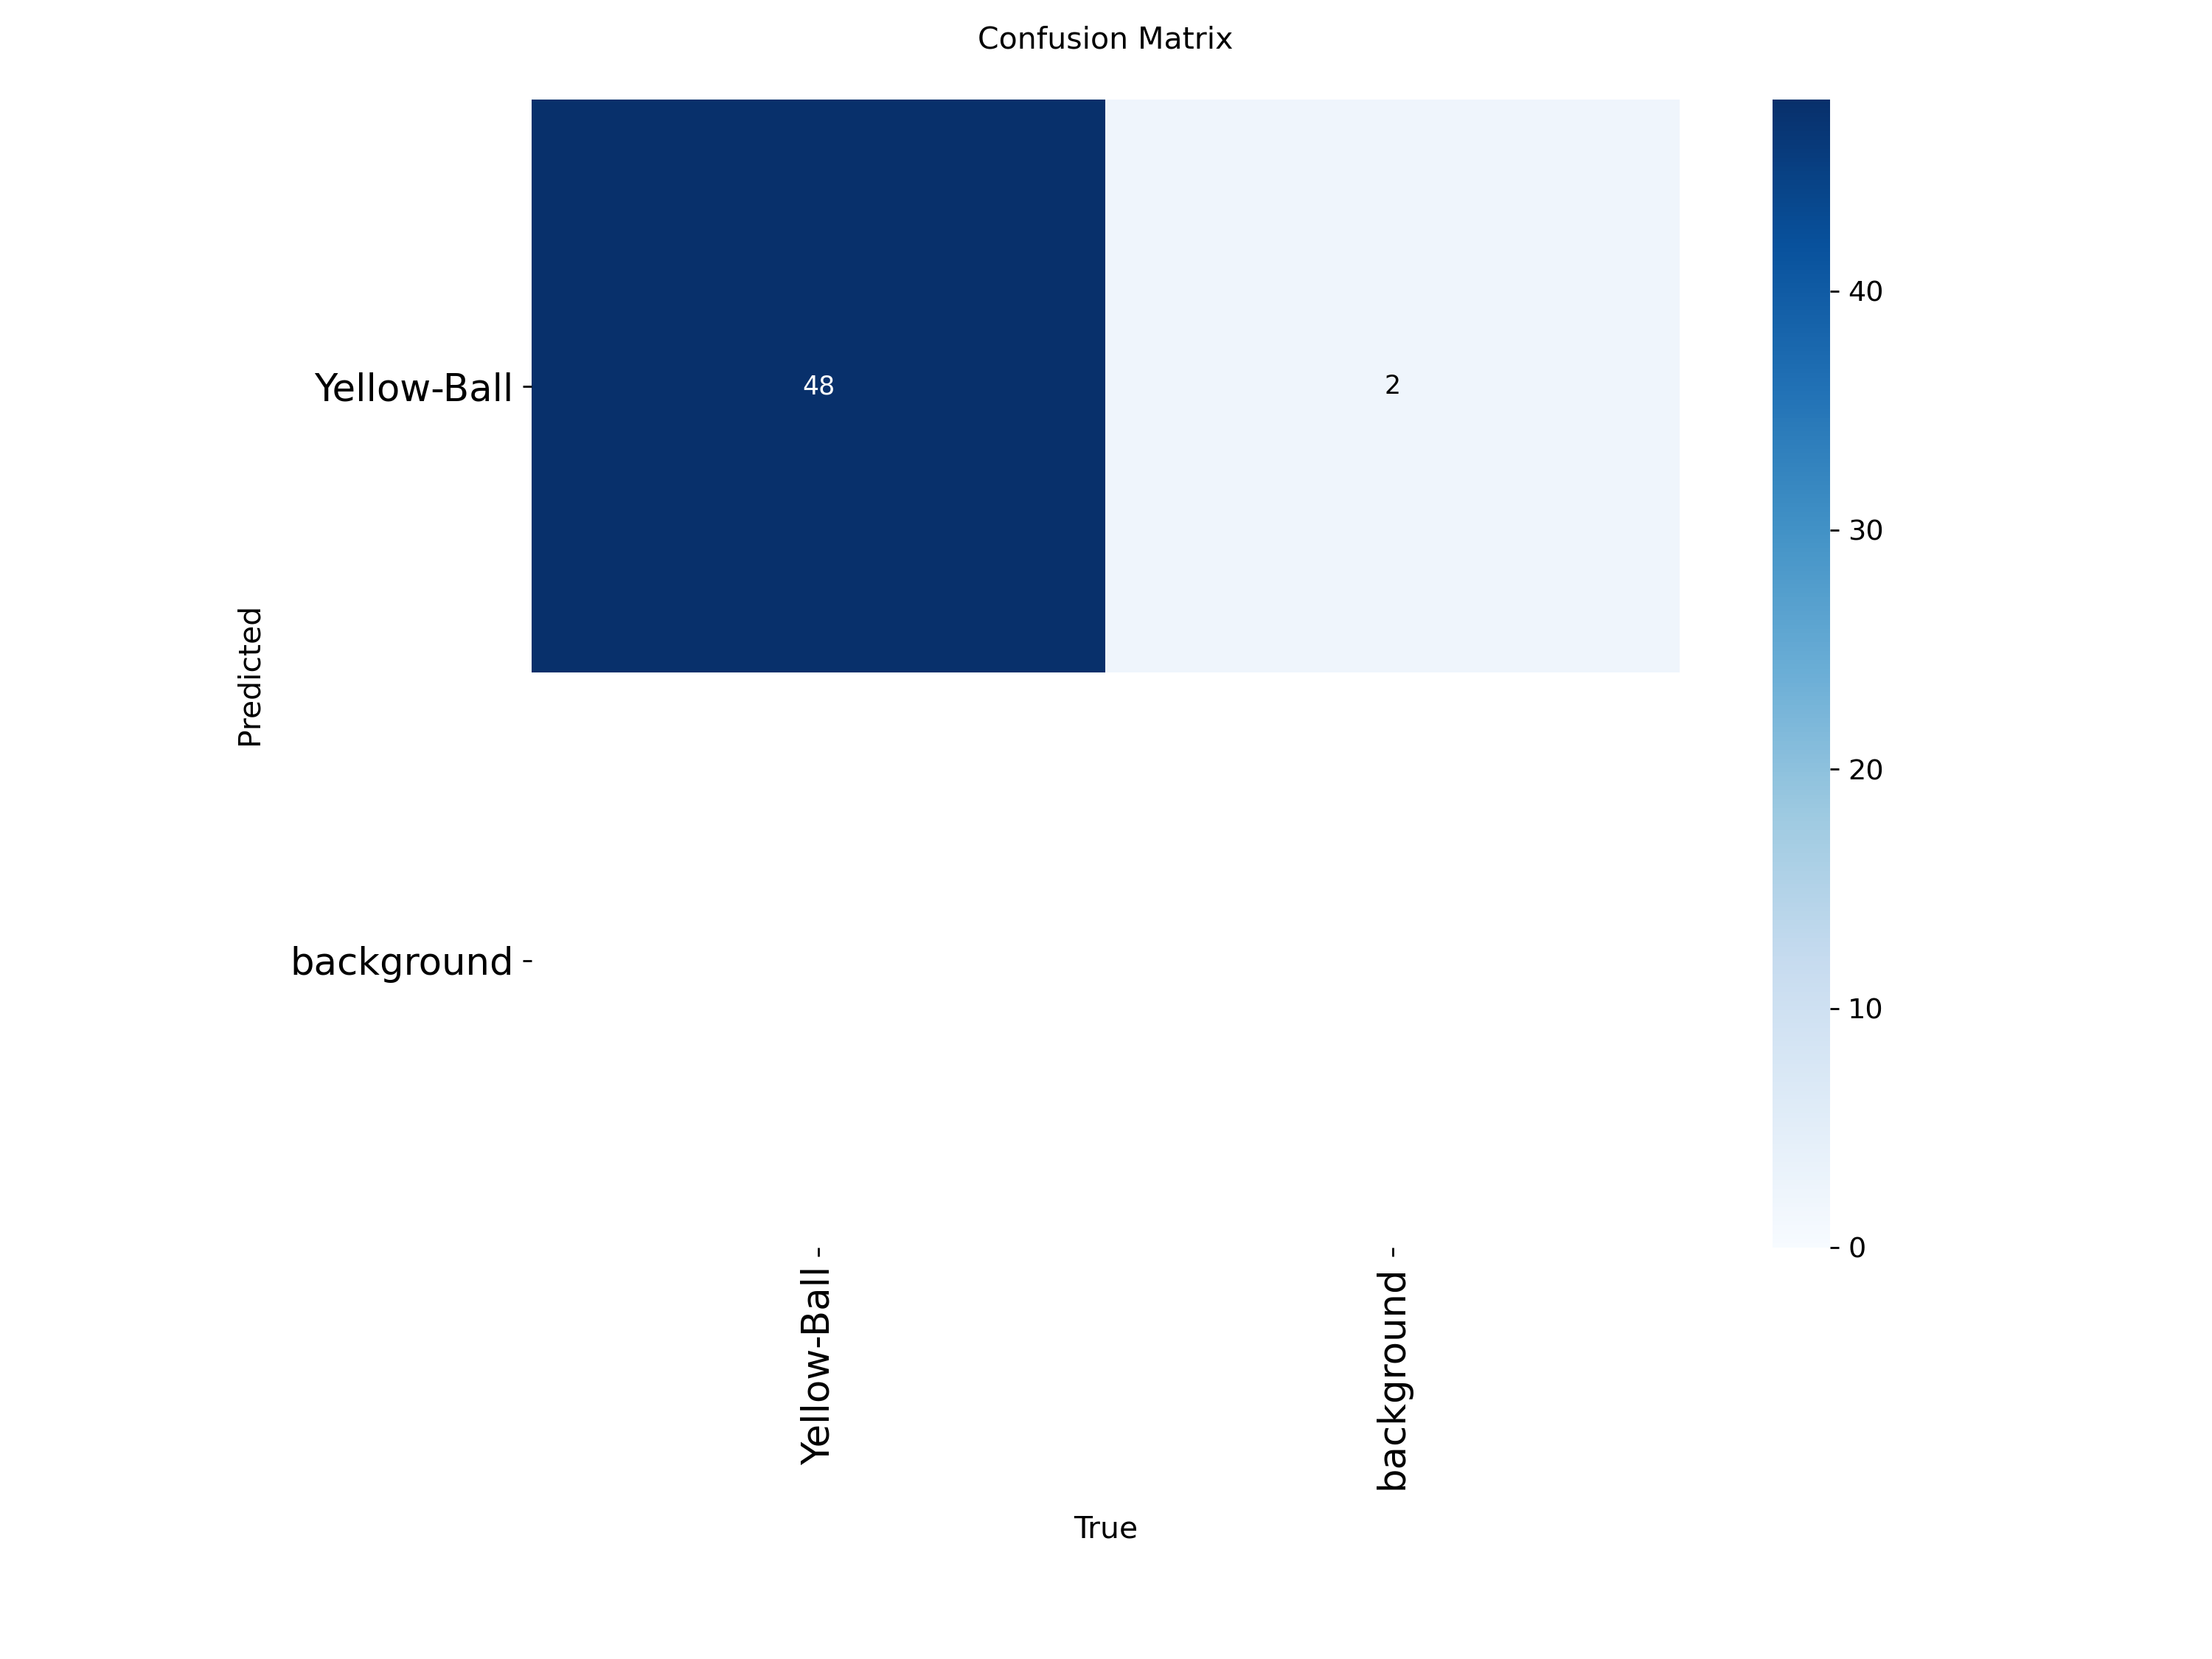

In [ ]:
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png',width=600)

In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 787.1±244.2 MB/s, size: 26.7 KB)
val: Scanning /content/MakerSpace-8/valid/labels.cache... 48 images, 0 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.66it/s]
                   all         48         48          1      0.978      0.994      0.933
Speed: 3.2ms preprocess, 12.9ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt source={dataset.location}/test/images

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs

image 1/35 /content/MakerSpace-8/test/images/20230718_150530_jpg.rf.e22e75485682274d872d95a89880cd09.jpg: 640x640 1 Yellow-Ball, 12.5ms
image 2/35 /content/MakerSpace-8/test/images/20230718_150532_jpg.rf.f514b241214c57e1783cb702b92d29da.jpg: 640x640 1 Yellow-Ball, 8.8ms
image 3/35 /content/MakerSpace-8/test/images/20230718_150548_jpg.rf.9d754b7c30a9d74e150ce3d4a9cbec52.jpg: 640x640 1 Yellow-Ball, 8.4ms
image 4/35 /content/MakerSpace-8/test/images/20230718_150712_jpg.rf.07e543e608e4b13df69a3388c333cc5a.jpg: 640x640 2 Yellow-Balls, 8.2ms
image 5/35 /content/MakerSpace-8/test/images/20230718_150855_jpg.rf.5035537004aee6edbb921a3c77accd9a.jpg: 640x640 2 Yellow-Balls, 7.9ms
image 6/35 /content/MakerSpace-8/test/images/20230718_151256_jpg.rf.c5f034ab611f2da16e41e6a1b2610ffd.jpg: 640x640 1 Yellow-Ball, 8.0ms
image 7/35 /content/

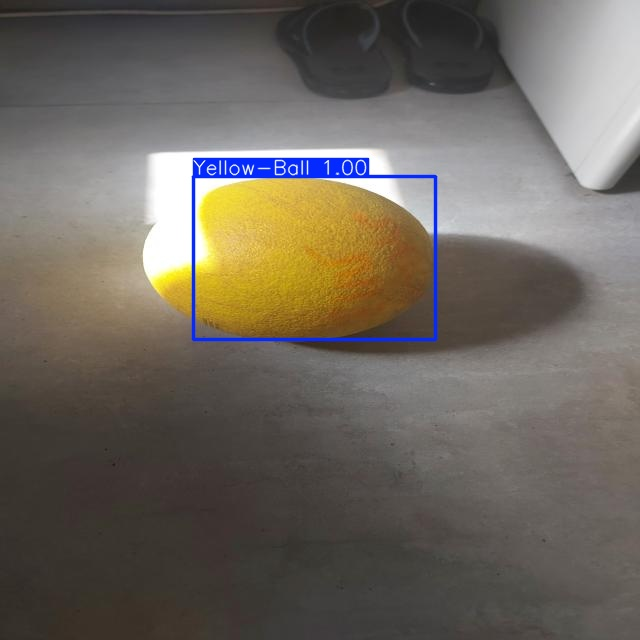

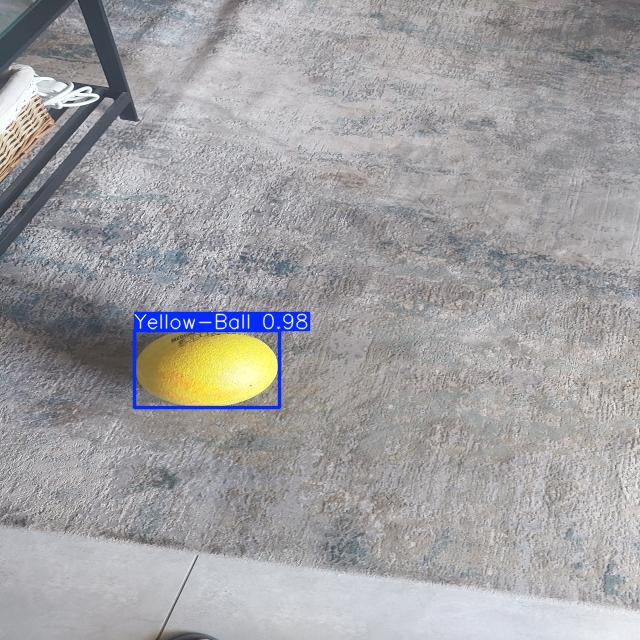

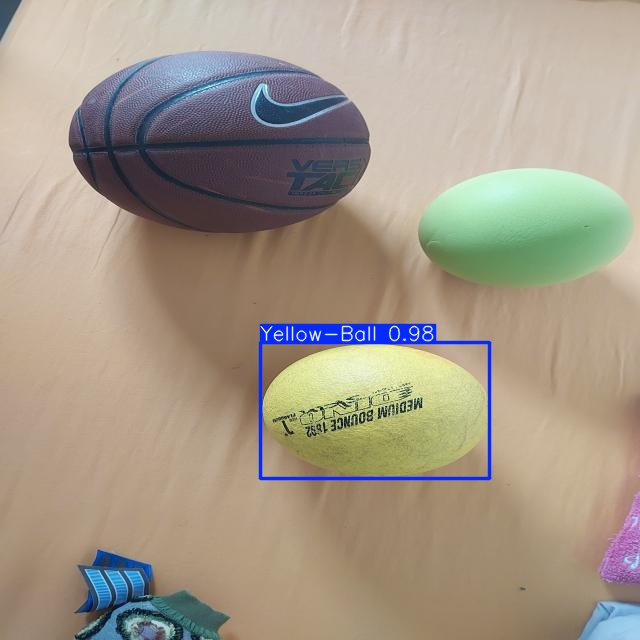

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=image_path, width=600))
  print("\n")

In [ ]:
#Download Custom Trained YOLO Model

#create folder to stor model weights and train results
!mkdir /content/ZYOLO
!cp /content/runs/detect/train/weights/best.pt /content/ZYOLO/ZYOLO.pt
!cp -r /content/runs/detect/train/ /content/ZYOLO

#zip
%cd ZYOLO
!zip /content/ZYOLO.zip ZYOLO.pt
!zip -r /content/ZYOLO.zip train
%cd /content

/content/ZYOLO
  adding: ZYOLO.pt (deflated 10%)
  adding: train/ (stored 0%)
  adding: train/confusion_matrix.png (deflated 38%)
  adding: train/train_batch2.jpg (deflated 1%)
  adding: train/train_batch1.jpg (deflated 3%)
  adding: train/train_batch0.jpg (deflated 2%)
  adding: train/F1_curve.png (deflated 16%)
  adding: train/train_batch131.jpg (deflated 9%)
  adding: train/args.yaml (deflated 52%)
  adding: train/val_batch1_pred.jpg (deflated 12%)
  adding: train/labels.jpg (deflated 43%)
  adding: train/val_batch0_pred.jpg (deflated 5%)
  adding: train/train_batch132.jpg (deflated 5%)
  adding: train/results.png (deflated 6%)
  adding: train/PR_curve.png (deflated 29%)
  adding: train/train_batch130.jpg (deflated 5%)
  adding: train/results.csv (deflated 59%)
  adding: train/weights/ (stored 0%)
  adding: train/weights/last.pt (deflated 10%)
  adding: train/weights/best.pt (deflated 10%)
  adding: train/P_curve.png (deflated 18%)
  adding: train/val_batch1_labels.jpg (deflated 13%